# BUDT704 Project Report
## Bike Sharing Analysis
### Group 15 [Int Elligence]:
 - Kai-Hsiang Lin, Shubhangkar Girish Jain, Marco Sesay, Samrat Leuva, Shivakumar Vastrad, Yanjie Chen, Bradley R. Mascarenhas

# <b>`Introduction`

The rapid rise in urbanization has led to the adoption of shared mobility models in many major cities around the world. Among the the many different models, the bike sharing platforms has seen an exponential rise in its usage over the 2017-2019 period. The bike sharing platforms (shared micro mobility) popularity can be accounted to a few factors.

- Growing consensus on sustainability
- Ease of usage
- Last mile connectivity

<center><img src="https://cdn.statcdn.com/Infographic/images/normal/13483.jpeg" /></center>
<br>  
For this project, we have taken the bike sharing program in Chicago, put in place by <b><i>Divvy</b></i>. Further, we will analyze the trends observed on the program. We will also look at factors like weather conditions, temperature in perticular, and holiday season that effect usage trends of the subscribed and the un-subscribed users.

    
Finally based on the analysis, the team will provide a few recomendations to optimize bike usage, expand by recommending new bike docking locations, and share details on bike dock hot spots that local business can make use of to promote thier businesses by evaluating these high density transit points.
    


-----------------------------------    
Source: https://www.mckinsey.com/industries/automotive-and-assembly/our-insights/shared-mobility-where-it-stands-where-its-headed

### <b>`Dataset Description`
The data set for the project is acquired from Kaggle. The user who uploaded the data, pooled information from the “Divvy” portal and corresponding weather details from the “wunderground” website.</br>

<b>`Source`:</br></b>
Divvy Data: https://www.divvybikes.com/system-data</br>
Weather Data: https://www.wunderground.com/</br>
Kaggle: https://www.kaggle.com/yingwurenjian/chicago-divvy-bicycle-sharing-data</br>
</br>
The data is taken for the period 2013 - 2017, for the purpose of this project we are making use of the raw data set presented by the user. The data in particular has two sections to it, the first half corresponds to the details of the bike sharing platform “Divvy.” It includes the following variables:


    - Categorical variables: trip_id, usertype, gender, from_station_name, from_station_id, to_station_name, to_station_id. 
    - Numeric variables: starttime, stoptime, tripduration, dpcapacity_start (docking point), dpcapacity_end (docking point), latitude_start, longitude_start, latitude_end and longitude_end.
The second half of the data, corresponding to the details of the weather includes: 

    - Numerical variables: temperature, windchill, dewpoint, humidity, pressure, visibility, wind_speed and precipitation
    Categorical variables: events and conditions

For the purpose of our analysis, we will focus on 3826746 data points for the year 2017.

We would like our project to be heavily graded on data analysis. Our analysis encompasses a lot of columns present in the data set, giving us some insightful findings and a broader understanding as to how Divvy operates in addition to some recommendations that can be incorprated for greater usage and higher revenue for the organization. 

### Data Acquisition and Cleaning Code

In [1]:
# Import necessary libraries for data cleaning
import pandas as pd
import numpy as np
import datetime as dt
from pandas.tseries.holiday import USFederalHolidayCalendar

In [2]:
# Read the raw data set
original_data_set_path = r'/Users/hayashikaishou/Desktop/UMD/2021 Fall/BUDT704 - Data Processing and Analysis in Python/HW/Group Project/'
bike_sharing_original_dataset = pd.read_csv(original_data_set_path+'data_raw.csv',index_col=False)

/var/folders/47/6p9r_fz55bz_3b7zzw4r8fym0000gn/T/ipykernel_54756/47130121.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  bike_sharing_original_dataset = pd.read_csv(original_data_set_path+'data_raw.csv',index_col=False)


In [3]:
len(bike_sharing_original_dataset)

13774715

#### 1. Extract Data from Year 2017
Since the dataset contains records of several years, we will only be using records that occured in 2017 for our analysis to get a clear picture about how the bikes are used and who uses them.

In [4]:
# Filter out data that are only from year 2017
bike_sharing_original_dataset['year'] = pd.DatetimeIndex(bike_sharing_original_dataset['starttime']).year
bike_sharing_data = bike_sharing_original_dataset[bike_sharing_original_dataset['year']==2017].copy(deep=True)
bike_sharing_data.head()

trip_id    usertype  gender            starttime  \
9947969  13518905  Subscriber    Male  2017-03-31 23:59:07   
9947970  13518904  Subscriber    Male  2017-03-31 23:56:25   
9947971  13518903  Subscriber  Female  2017-03-31 23:55:33   
9947972  13518902  Subscriber    Male  2017-03-31 23:54:46   
9947973  13518901  Subscriber  Female  2017-03-31 23:53:33   

                    stoptime  tripduration  from_station_id  \
9947969  2017-04-01 00:13:24           857               66   
9947970  2017-04-01 00:00:21           236              199   
9947971  2017-04-01 00:01:21           348              520   
9947972  2017-03-31 23:59:34           288              110   
9947973  2017-04-01 00:00:28           415              327   

                   from_station_name  latitude_start  longitude_start  ...  \
9947969         Clinton St & Lake St       41.885637       -87.641823  ...   
9947970       Wabash Ave & Grand Ave       41.890912       -87.626804  ...   
9947971   Greenview Ave & Jarvis Ave       42.015962       -87.668570  ...   
9947972        Dearborn St & Erie St       41.893992       -87.629318  ...   
9947973  Sheffield Ave & Webster Ave       41.921540       -87.653818  ...   

         windchill  dewpoint humidity  pressure  visibility  wind_speed  \
9947969       32.1      30.9     76.0     30.05        10.0         8.1   
9947970       32.1      30.9     76.0     30.05        10.0         8.1   
9947971       32.1      30.9     76.0     30.05        10.0         8.1   
9947972       32.1      30.9     76.0     30.05        10.0         8.1   
9947973       32.1      30.9     76.0     30.05        10.0         8.1   

         precipitation\t          rain  conditions  year  
9947969          -9999.0  partlycloudy           0  2017  
9947970          -9999.0  partlycloudy           0  2017  
9947971          -9999.0  partlycloudy           0  2017  
9947972          -9999.0  partlycloudy           0  2017  
9947973          -9999.0  partlycloudy           0  2017  

[5 rows x 27 columns]

In [5]:
# Look for null/missing values in each column
bike_sharing_data.isnull().sum()

trip_id                   0
usertype                  0
gender               836434
starttime                 0
stoptime                  0
tripduration              0
from_station_id           0
from_station_name         0
latitude_start            0
longitude_start           0
dpcapacity_start          0
to_station_id             0
to_station_name           0
latitude_end              0
longitude_end             0
dpcapacity_end            0
temperature               0
windchill                 0
dewpoint                  0
humidity                  0
pressure                  0
visibility                0
wind_speed                0
precipitation\t           0
rain                      0
conditions                0
year                      0
dtype: int64

#### Inference
- The variable Gender is the only variable with missing values
- This was probably because most of these records were generated by customers (non-subscribers); therefore, the system was not able to capture their genders.
- In order to decide which method to use to replace these missing values, we first need to calculate the gender proportion of the existing values.

In [6]:
# Check the gender percentage for the existing values
male_percentage = ((bike_sharing_data['gender'].value_counts() / bike_sharing_data['gender'].notnull().sum())[0]).round(2)
female_percentage = ((bike_sharing_data['gender'].value_counts() / bike_sharing_data['gender'].notnull().sum())[1]).round(2)
print(male_percentage)
print(female_percentage)

0.75
0.25


#### 2. Assign New Values Based on the Percentage of Recorded Gender Values
- We can see that there are about 75% of males and 25% of females in the recorded gender.
- After doing some research, our team decided to assign new gender to the missing values based on the gender percentage of the recorded gender.
- This is a good method since the overall gender pencentage will be a good reflection of the recorded values.

In [7]:
# Set up a condition to filter out the records with missing gender
gender_missing = bike_sharing_data['gender'].isnull()
# Count the number of records with missing gender
missing_length = gender_missing.sum()
# Create an array of new values to fill up the missing 'holes' based on the percentage of the existing values
new_values = np.random.choice(['Male', 'Female'], p=[male_percentage, female_percentage], size=missing_length)
# Assign new values to the variable to fill up the missing values
bike_sharing_data.loc[gender_missing, 'gender'] = new_values

In [8]:
# Reassure that no more missing value in the dataset
bike_sharing_data.isnull().sum()

trip_id              0
usertype             0
gender               0
starttime            0
stoptime             0
tripduration         0
from_station_id      0
from_station_name    0
latitude_start       0
longitude_start      0
dpcapacity_start     0
to_station_id        0
to_station_name      0
latitude_end         0
longitude_end        0
dpcapacity_end       0
temperature          0
windchill            0
dewpoint             0
humidity             0
pressure             0
visibility           0
wind_speed           0
precipitation\t      0
rain                 0
conditions           0
year                 0
dtype: int64

In [9]:
# Check if the gender percentage remains the same as the original non-missing values
bike_sharing_data['gender'].value_counts() / bike_sharing_data['gender'].notnull().sum()

Male      0.750374
Female    0.249626
Name: gender, dtype: float64

#### 3. Extracting the date and time information
 - Making use of split functionality to pull out the Month, Date, Hours, Minutes and Seconds from the starttime column
 - The regular expression used will split the string on either a hyphen, space or a colon
 - The string is split and placed into individual columns: Month, Date, Hours, Minutes and Seconds
 - The week number is generated by making use of the datetime library

In [10]:
# Prepares the a new DateFrame column: convert the variable starttime to string in order to split the date object
bike_sharing_data['temp_column'] = bike_sharing_data['starttime']
bike_sharing_data['temp_column'].astype(str)

9947969     2017-03-31 23:59:07
9947970     2017-03-31 23:56:25
9947971     2017-03-31 23:55:33
9947972     2017-03-31 23:54:46
9947973     2017-03-31 23:53:33
                   ...         
13774710    2017-10-01 00:01:00
13774711    2017-10-01 00:00:00
13774712    2017-10-01 00:00:00
13774713    2017-10-01 00:00:00
13774714    2017-10-01 00:00:00
Name: temp_column, Length: 3826746, dtype: object

In [11]:
# The below code is used to pull out the date and time information out of the starttime column
# temp_column_1 stores the year (prevent duplication with variable 'year')
bike_sharing_data[['temp_column_1','Month','Date','Hours','Minutes','Seconds']] = bike_sharing_data['temp_column'].str.split('[-]|[\s]|[:]', 5, expand=True)

In [12]:
# The below code is used to generate the week number from the given date
# Create a variable - Week Number to store the just year, month, and date
# Use a dt function to calculate the week number
bike_sharing_data[['Week Number','temp_column_1']] = bike_sharing_data['temp_column'].str.split('[\s]', 1, expand=True)
bike_sharing_data['Week Number'] = pd.to_datetime(bike_sharing_data['Week Number'])
bike_sharing_data['Week Number'] = bike_sharing_data['Week Number'].dt.isocalendar().week

In [13]:
# Dropping temporary columns
bike_sharing_data.drop('temp_column',axis = 1, inplace=True)
bike_sharing_data.drop('temp_column_1',axis = 1, inplace=True)

In [14]:
# Converting the data into integer type for further processing
bike_sharing_data[['Month','Date','Hours','Minutes','Seconds', 'Week Number']].astype(int)

Month  Date  Hours  Minutes  Seconds  Week Number
9947969       3    31     23       59        7           13
9947970       3    31     23       56       25           13
9947971       3    31     23       55       33           13
9947972       3    31     23       54       46           13
9947973       3    31     23       53       33           13
...         ...   ...    ...      ...      ...          ...
13774710     10     1      0        1        0           39
13774711     10     1      0        0        0           39
13774712     10     1      0        0        0           39
13774713     10     1      0        0        0           39
13774714     10     1      0        0        0           39

[3826746 rows x 6 columns]

#### 4. Create Temperature Bins

# Use describe function to check summary statistics of this variable

In [15]:
bike_sharing_data['temperature'].describe()

count    3.826746e+06
mean     6.544106e+01
std      1.654422e+01
min     -2.900000e+00
25%      5.590000e+01
50%      7.000000e+01
75%      7.700000e+01
max      9.500000e+01
Name: temperature, dtype: float64

#### Inference
- By using the describe function, we can obtain the summary statistics of the variable Temperature. We can see that the data range for the temperature ranges from -2.9 degrees to 95 degrees. 
- We are binning the temperature variable into bins of 10 degrees to convert it into a categorical variable for analysis purpose.

In [16]:
# Bins the temperature in blocks of 10 degrees
bins = np.arange(-10,101,10)
bike_sharing_data['Temperature Bin'] = pd.cut(bike_sharing_data['temperature'], bins)

#### 5. Create a New Variable to Store the Value of Weekday/Weekend

In [17]:
# Convert the type of variable in column 'starttime' to datetime.
starttime_datetime = pd.to_datetime(bike_sharing_data['starttime'])
# 0 represents the first day of a week - Monday
bike_sharing_data['weekday/weekend']=starttime_datetime.dt.dayofweek.map(lambda x: 'weekday' if x in [0,1,2,3,4] else 'weekend')

#### 6. To identify Federal holidays in the year 2017

In [18]:
# Identifying federal holiday for the year 2017
calendar = USFederalHolidayCalendar()
holidays = calendar.holidays(start='2017-01-01', end='2017-12-31').to_pydatetime()

### Data Analysis

In [19]:
# Import necessary libraries to conduct analyses
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Analysis 1: How temperature influences the count of trips and trip duration and identify the range of temperature that creates the most demand
- The visualization for our analysis should be a dual-axis chart with bars and lines. 
- Temperature should be the value on the x-axis, and trip count and trip duration should be on the two sides of the y-axis. 
- The trip count should be in bars, and average trip duration should be in a line.

In [20]:
# Calculate total trip counts based on each temperature bin
ser_trip_count = bike_sharing_data['Temperature Bin'].groupby(by=bike_sharing_data['Temperature Bin']).count()
df_trip_count = pd.DataFrame(ser_trip_count)

# Rename the column
df_trip_count.rename(columns = {'Temperature Bin':'Trip Count'}, inplace = True)

In [21]:
# Calucate average trip duration based on each temperature bin
ser_trip_duration = (bike_sharing_data['tripduration'].groupby(by=bike_sharing_data['Temperature Bin']).sum()) / ser_trip_count
df_trip_duration = pd.DataFrame(ser_trip_duration)

# Rename the column
df_trip_duration.rename(columns = {0:'Average Trip Duration'}, inplace = True)

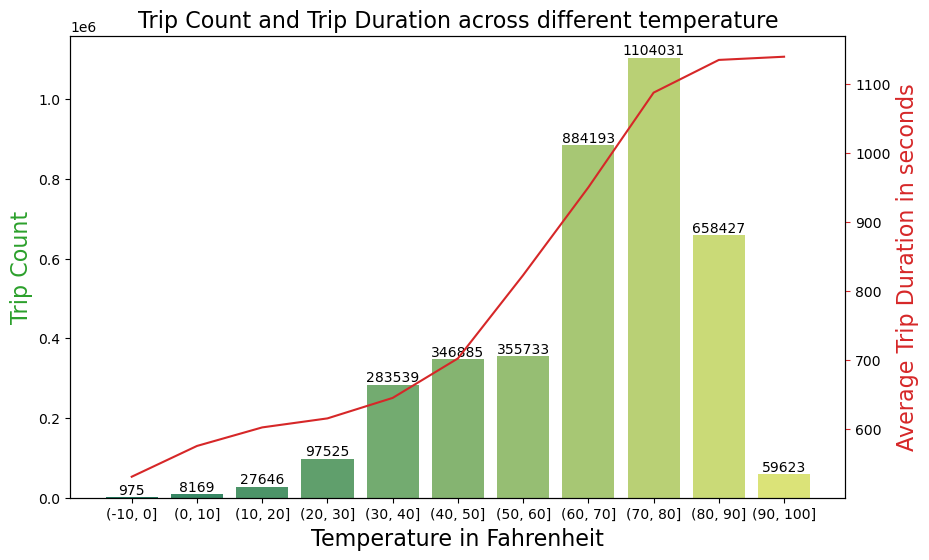

In [22]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('Trip Count and Trip Duration across different temperature', fontsize=16)
ax1 = sns.barplot(x=df_trip_count.index, y='Trip Count', data = df_trip_count, palette='summer')
ax1.set_ylabel('Trip Count', fontsize=16, color=color)
ax1.set_xlabel('Temperature in Fahrenheit', fontsize=16)
ax1.tick_params(axis='y')
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height:.0f}',xy=(p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Trip Duration in seconds', fontsize=16, color=color)
ax2 = sns.lineplot(x=df_trip_duration.index.astype(str), y='Average Trip Duration', data = df_trip_duration, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

#### Inference
1. As the temperature becomes more ideal and comfortable, the number of trips will increase. As the temperature becomes more extreme, the number of trips will decrease.
2. Interestingly, as the temperature continues to increase, the average trip duration continues to rise instead of dropping down to the extent that the highest temperature bin has the highest average trip duration. 
3. 70 to 80 degrees temperature range creates the most demand.

#### Analysis 2 & 3: Identify the top 10 most popular stations for both start and end stations
- The visualization should be two maps with stations pinpointed on them 
- This will help us analyze the driving factors that make them the most popular ones. 

In [23]:
# Find the top 10 starting station with the highest ride counts leaving
top10_start_station = bike_sharing_data['from_station_name'].value_counts()[:10].sort_values(ascending=False)

# Create a DataFrame that only has three variables: station name, longtitude and latitude to find their corresponding locations
df_start_station = bike_sharing_data.filter([ 'from_station_name', 'latitude_start', 'longitude_start']) 
# Drop all duplicated stations
df_start_station.drop_duplicates(subset = 'from_station_name',inplace = True)

# Filter out only the top 10 starting stations
df_start_station = df_start_station[df_start_station['from_station_name'].isin(top10_start_station.index)]

In [24]:
# Find the top 10 ending station with the highest ride counts arriving
top10_end_station = bike_sharing_data['to_station_name'].value_counts()[:10].sort_values(ascending=False)

# Create a DataFrame that only has three variables: station name, longtitude and latitude to find their corresponding locations
df_end_station = bike_sharing_data.filter(['to_station_name', 'latitude_end', 'longitude_end']) 

# Drop all duplicated stations
df_end_station.drop_duplicates(subset='to_station_name',inplace = True )

# Filter out only the top 10 ending stations
df_end_station = df_end_station[df_end_station['to_station_name'].isin(top10_end_station.index)]

In [25]:
# Passing token number from mapbox
mapbox_access_token = 'pk.eyJ1Ijoic2xldXZhIiwiYSI6ImNrdzloa2RoNTI4c3YydW1wM3ZyeGswa2gifQ.5kj31NlweiA7m2dQxiCfNA'

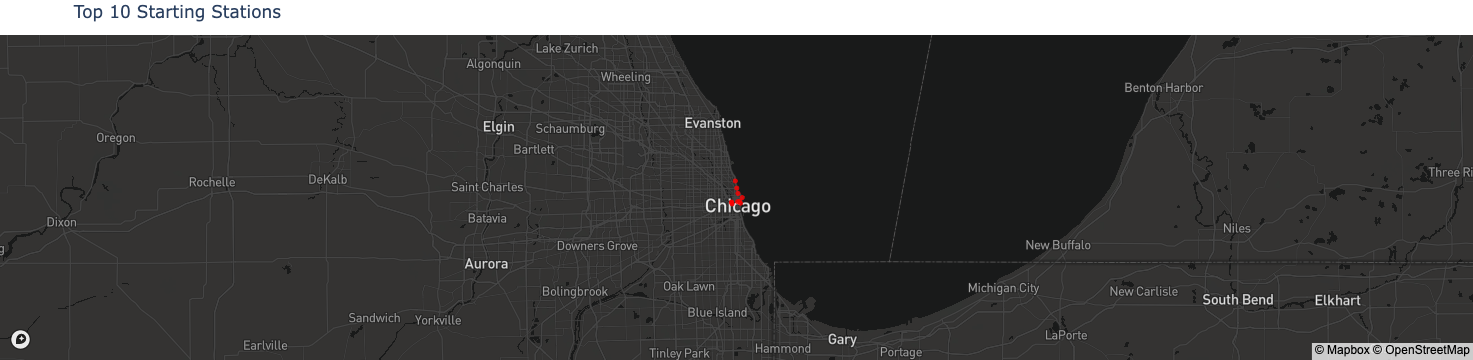

In [26]:
# Plotting start station map by passing Longitude, Latitude and Station Name to map_data parameter
start_station_map = px.scatter_mapbox(df_start_station, lat='latitude_start', lon='longitude_start', hover_name='from_station_name', hover_data = {'latitude_start': False, 'longitude_start': False}, color_discrete_sequence=['red'], zoom=8, height=300,
                         opacity = 0.8)
start_station_map.update_layout(mapbox_style='dark', mapbox_accesstoken=mapbox_access_token)
start_station_map.update_layout(margin={'r':0,'t':35,'l':0,'b':0})
start_station_map.update_layout(title = 'Top 10 Starting Stations')
start_station_map.show()

#### Inference
- From the map generated above, we can identify that popular starting stations are located at two types of locations:
1. `Tourist attractions`: museum, park, club, beach...
2. `Transportation hubs`: transportation center, train stations, metro stations...
- We conclude that since people who visit tourist attractions are more likely to visit them for a leisure purpose, this makes those people more likely to ride from these attraction sites to their next destination.
- In addition, since bikes serve as an intermediate medium of transportation, stations are located at places that the most people travel to or through in order to help travellers reach their final destinations.


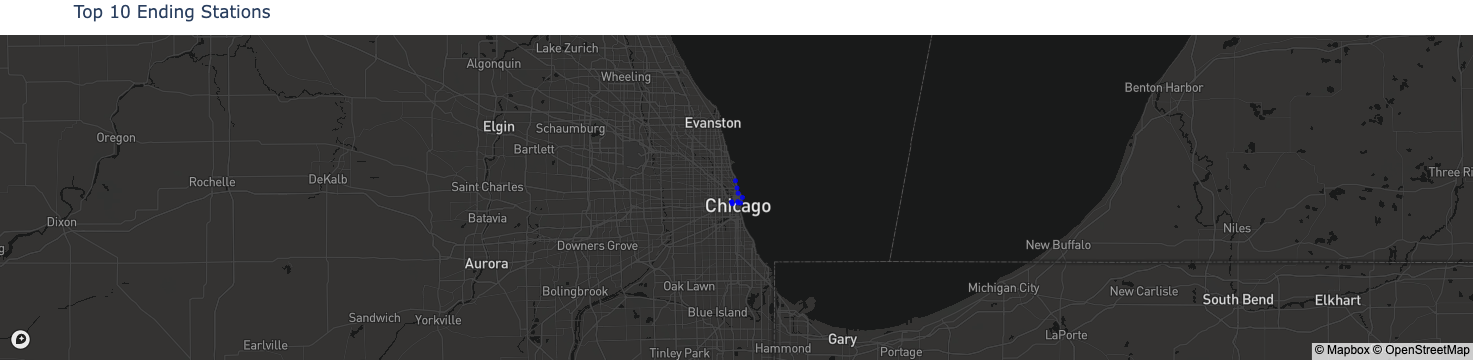

In [27]:
# Plotting end station map by passing Longitude, Latitude and Station Name to map_data parameter
end_station_map = px.scatter_mapbox(df_end_station, lat='latitude_end', lon='longitude_end', hover_name='to_station_name', hover_data = {'latitude_end': False, 'longitude_end': False}, color_discrete_sequence=['blue'], zoom=8, height=300,
                         opacity = 0.8)
end_station_map.update_layout(mapbox_style='dark', mapbox_accesstoken=mapbox_access_token)
end_station_map.update_layout(margin={'r':0,'t':35,'l':0,'b':0})
end_station_map.update_layout(title = 'Top 10 Ending Stations')
end_station_map.show()

#### Inference
- From the map generated above, we can see that the most popular ending stations are also located near major `tourists attractions` and `transportation hubs`.
- The nature of these locations: 'leisure' and 'transfer/trasnport' makes them attract a large number of riders.
- However, the ending stations are not located near any business or financial centers as we initially predicted. It seems like that people don't choose to ride to work.
- Our team conclude that this may because of that business professionals choose other methods of transportation to travel from transportation hubs to their offices due to time-consuming factor of cycling to work or unexpected events that may cause delayed arrival to work.

#### Analysis 4: Analyse the riding behaviors of subscribed and unsubscribed users during national holidays and non holidays
- The visualization should be a bar chart with four bars that represent four target groups:
1. Subscribers on Holidays
2. Non-subscribers on Holidays
3. Subscribers on Non-holidays
4. Non-subscribers on Non-holidays

In [28]:
# Convert the values in the 2017 holidays list into datetime 
holidays_datetime=pd.to_datetime(holidays)

In [29]:
# Create a variable for the Date (yyyy-mm-dd) for each ride
bike_sharing_data['starttime_date'] = bike_sharing_data['starttime'].str.split(' ').str[0]

# Convert these string values into datetime
bike_sharing_data['starttime_date'] = pd.to_datetime(bike_sharing_data['starttime_date'])

In [30]:
# Filter out two groups of riders: subscribers and non-subscribers
bike_sharing_data_sub = bike_sharing_data[bike_sharing_data['usertype'] == 'Subscriber']
bike_sharing_data_nonsub = bike_sharing_data[bike_sharing_data['usertype'] != 'Subscriber']

In [31]:
# Calculate the average trip counts per day on national holidays for subscribers and non-subscribers
holiday_sub = sum(bike_sharing_data_sub['starttime_date'].map(lambda x: True if x in holidays_datetime else False))/len(holidays)
holiday_nonsub = sum(bike_sharing_data_nonsub['starttime_date'].map(lambda x: True if x in holidays_datetime else False))/len(holidays)

# Calculate the average trip counts per day during non-holidays for subscribers and non-subscribers
non_holiday_sub = sum(bike_sharing_data_sub['starttime_date'].map(lambda x: False if x in holidays_datetime else True))/(len(pd.unique(bike_sharing_data_sub['starttime_date']))-len(holidays))
non_holiday_nonsub = sum(bike_sharing_data_nonsub['starttime_date'].map(lambda x: False if x in holidays_datetime else True))/(len(pd.unique(bike_sharing_data_nonsub['starttime_date']))-len(holidays))

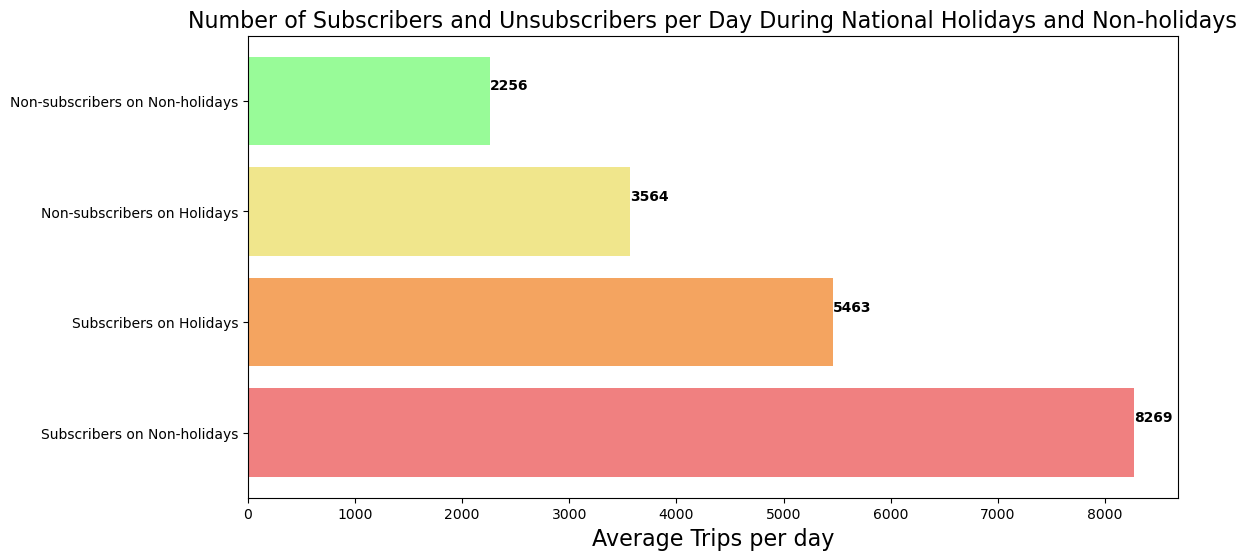

In [32]:
# Create the bar chart that display the value for four variables created above
x = ['Subscribers on Non-holidays','Subscribers on Holidays','Non-subscribers on Holidays','Non-subscribers on Non-holidays']
y = [non_holiday_sub,holiday_sub, holiday_nonsub , non_holiday_nonsub]
plt.figure(figsize=(12,6))
bars = plt.barh(x, y, color = ['lightcoral','sandybrown','khaki','palegreen'])
plt.xlabel('Average Trips per day', fontsize = 16)
plt.title('Number of Subscribers and Unsubscribers per Day During National Holidays and Non-holidays', fontsize = 16)

for i in bars.patches:
    plt.text(i.get_width()+0.3, i.get_y()+0.5, str(round((i.get_width()))), fontsize = 10, fontweight ='bold')

#### Inference
- From the bar chart we can conclude that :
1. The number of rides taken by non-subscribers during holidays increased compared to  during non-holidays. This result is pretty intuitive since there is a high chance that these non-subscribers are tourists or travellers that travel to Chicago for leisure purpose during holidays.
2. On the other hand, we can see that the rides taken by subscribers on holidays is lower in comparison with the number on holidays. We can conclude that the subscribers, who may also be the resident of the city of Chicago, utilize the bike sharing system to travel within the city for work.
2. It is clear that subsribers, the regular riders, are the group of people that generates the most demand of rides. Therefore, we suggest that Divvy should create marketing or pricing strategies that can target the existing subsribers and attract potential customers to join the system and become subscribers.

#### Analysis 5: Analyse the distribution of bikes demand based on the time (hours) in a day throughout a week - both weekdays and weekends
- The visualization should be a line plot with two lines represent:
1. Distribution of bikes demand in a day on weekdays
2. Distribution of bikes demand in a day on weekends

In [33]:
# Calculate the distribution of the percentage of bikes demand in a day on weekdays and weekends
weekday_trips = bike_sharing_data[bike_sharing_data['weekday/weekend']=='weekday']['Hours'].value_counts().sort_index(ascending=True)/sum(bike_sharing_data['weekday/weekend']=='weekday')*100
weekend_trips = bike_sharing_data[bike_sharing_data['weekday/weekend']=='weekend']['Hours'].value_counts().sort_index(ascending=True)/sum(bike_sharing_data['weekday/weekend']=='weekend')*100

# Create a DataFrame to store the two values above
weekday_weekend = {'weekday':weekday_trips,'weekend':weekend_trips}
weekday_weekend = pd.DataFrame(weekday_weekend)

Text(0.5, 1.0, 'Distribution of Trips Taken in 24 hours')

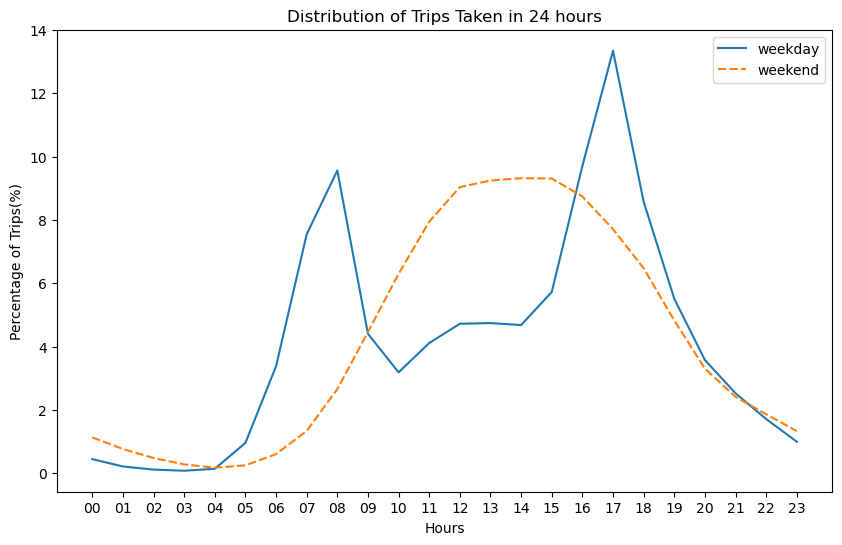

In [34]:
# Create a line plot to display the result
plt.figure(figsize = (10,6))
axes = sns.lineplot(data = weekday_weekend)
axes.set(xlabel = 'Hours', ylabel = 'Percentage of Trips(%)')
axes.set_title('Distribution of Trips Taken in 24 hours')

#### Inference 
- From the line chart we can conclude that:
1. The trips during weekend are usually taken from 12:00 to 16:00 when the temperature is comfortable for people to go for a ride. 
2. We can also see that the trips during weekday are usually taken from 7:00 to 8:00 and from 17:00 to 19:00. The reason is that these two time periods are considered as the 'rush hours', which are the most busiest time in a day when most people are going to and off work. 

### Conclusion
After performing our analysis on the 2017 bike sharing data of Chicago city, we found reasonable insights which tell us a lot about how the bikes are used, what are the kinds of people that use it along with the busy periods in the day.

From our first analysis, we show the average trip duration and the number of trips taken in year 2017. From this analysis, we wanted to identify what is the ideal temperature for a person to ride a bike. It showed us that as the temperature becomes warmer, people tend to ride the bike for a bit longer, even when it is extremely hot. This tells us that people enjoy riding the bike in higher temperatures and it would be recommended to increase the number of bikes available during these times so that more people could use and generate revenue for Divy. Additionally, we were able to say that when the temperature is between 60-90 degree fahrenheit, maximum people come out to ride a bike.

From our second analysis, we wanted to map out which are the most busiest stations by plotting the top 10 busiest starting and ending stations. Via this, we wanted to identify what areas in downtown Chicago are the most busy so that any new establishemnt like restaurants, cafes etc could be opened in and around these areas. From this, we were able to conclude that nine stations repeated themselved in both the lists and five were on the coast line indicating people love riding along the sea side. This also shows us that the probabilty of a new establishment opening in and around these nine stations earning high revenue is really large which makes it highly recommeneded area. Moreover, more docks could be added in these stations so that more cycles can be stored and if the station is at maximum capacity, then a new station could be built close by in order to distribute and increase the rides.

In our third analysis, we were filtering out the users based on rides taken on holidays and non-holidays. From this, we wanted to find out if average rides taken by non subscribers on holidays is higher or not when compared to non-holidays and if it is higher, what can be done about it. With subscribers, the visualization made it clear that non holidays had more rides but for non subscribers, holidays had more rides by approximately 50%. From a business point, this seems to be an opportunty to encourage non subscribers to take rides on other days as well and one way that could be done is by lowering the price a bit, not much that subscribers feel not valued, but enough to give non subscribers an incentive to ride. As a result, they would take more rides and once they start enjoying it and tend to reap in the benefits, there is a chance of them being ocnverted to subscribers.

From our final analysis, we wanted to plot out the busiest time during weekdays and weekends. This analysis would help us find the "busy" hours during any day and accordingly introduce surge pricing if needed for additional revenue. After performing this analysis, we saw that during weekdays, between 07:00 and 09:00 had a peak along with a higher peak during 17:00 to 19:00. This is majorly because most people go to and return from work during this time and hence, a slightly higher price could be charged. On weekdends, the distribution seems to be normally distributed between 07:00 and 21:00 which indicates that people choose to ride whenever they are free, but primarily in the noon when it is bright and shiny. Also, from this analysis, we can see that more rides are taken on weekdays than on weekend which indicates that any maintenace work for the bikes can be done on weekdays as there is lesser usage of it and more bikes could be deployed on weekdays as there seems to be more rides taking place. 

Hence, from all our analysis, we can conclude that there are some areas that can be improved and recommendations for the same are given. 